Importación de archivos

In [49]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster


In [50]:
current_dir = os.getcwd()
print(current_dir)
nombre_archivo="yelp_academic_dataset_business.json"
nombre_archivo_rw="yelp_academic_dataset_review.json"

/Users/clarakearney/Documents/UdeSA/MIA/AprendizajeAutomaticoII/tp_yelp


In [51]:
path = os.path.join(current_dir, "yelp_dataset", nombre_archivo)
print(f"Leyendo archivo desde: {path}")

businesses = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        businesses.append(json.loads(line))

Leyendo archivo desde: /Users/clarakearney/Documents/UdeSA/MIA/AprendizajeAutomaticoII/tp_yelp/yelp_dataset/yelp_academic_dataset_business.json


Análisis inicial

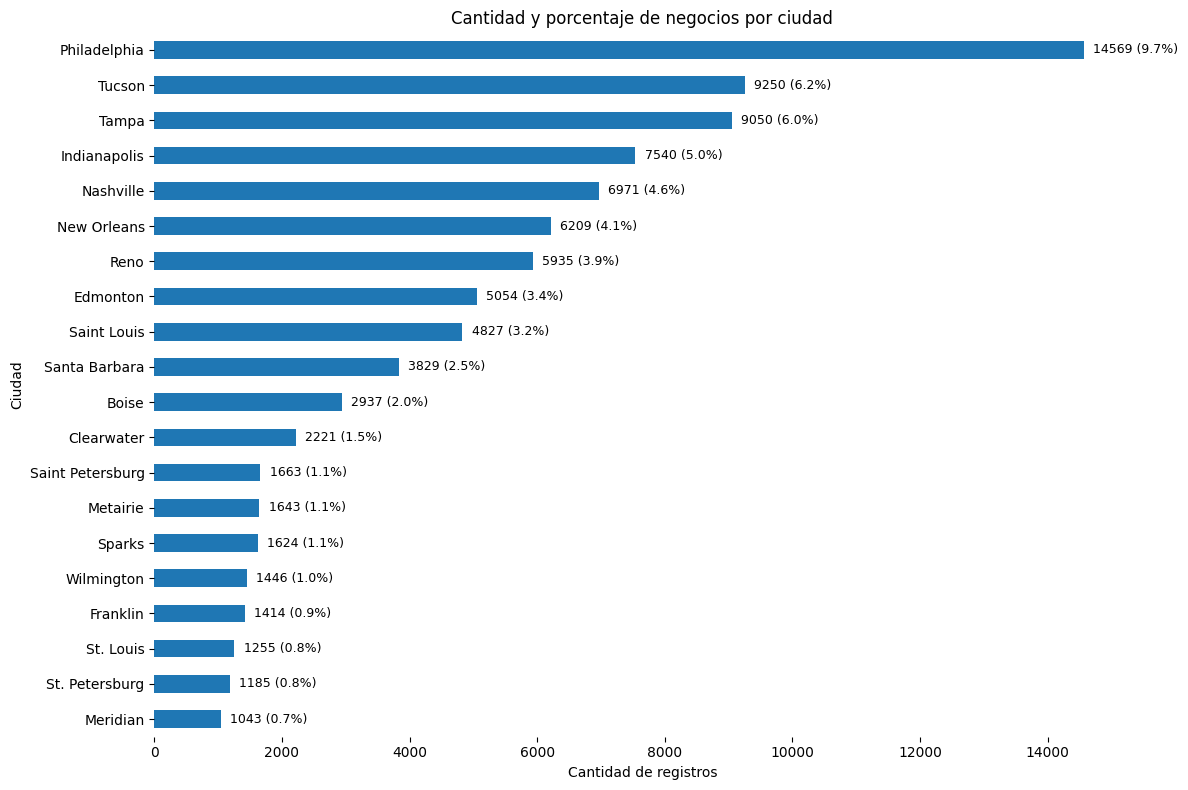

In [52]:
# Convertimos a DataFrame
df_business = pd.DataFrame(businesses)

# Contamos negocios por ciudad
city_counts = df_business["city"].value_counts()
total_businesses = city_counts.sum()

# Mostramos las 20 principales (por ejemplo)
top_cities = city_counts.head(20)
top_cities = top_cities.sort_values()
top_percentages = (top_cities / total_businesses) * 100

# Graficamos
plt.figure(figsize=(12, 8))
ax = top_cities.plot(kind="barh", color="#1f77b4")
plt.title("Cantidad y porcentaje de negocios por ciudad")
plt.xlabel("Cantidad de registros")
plt.ylabel("Ciudad")

# Etiquetamos cada barra con cantidad y porcentaje
label_offset = max(top_cities) * 0.01
for idx, value in enumerate(top_cities.values):
    pct = top_percentages.iloc[idx]
    ax.text(value + label_offset, idx, f"{value:.0f} ({pct:.1f}%)", va="center", fontsize=9)

# Quitamos el recuadro del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


/var/folders/n9/dtbl7mzs0dl8wwd0h1sv_3z80000gn/T/ipykernel_12819/82109729.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', city_star_counts.shape[1])


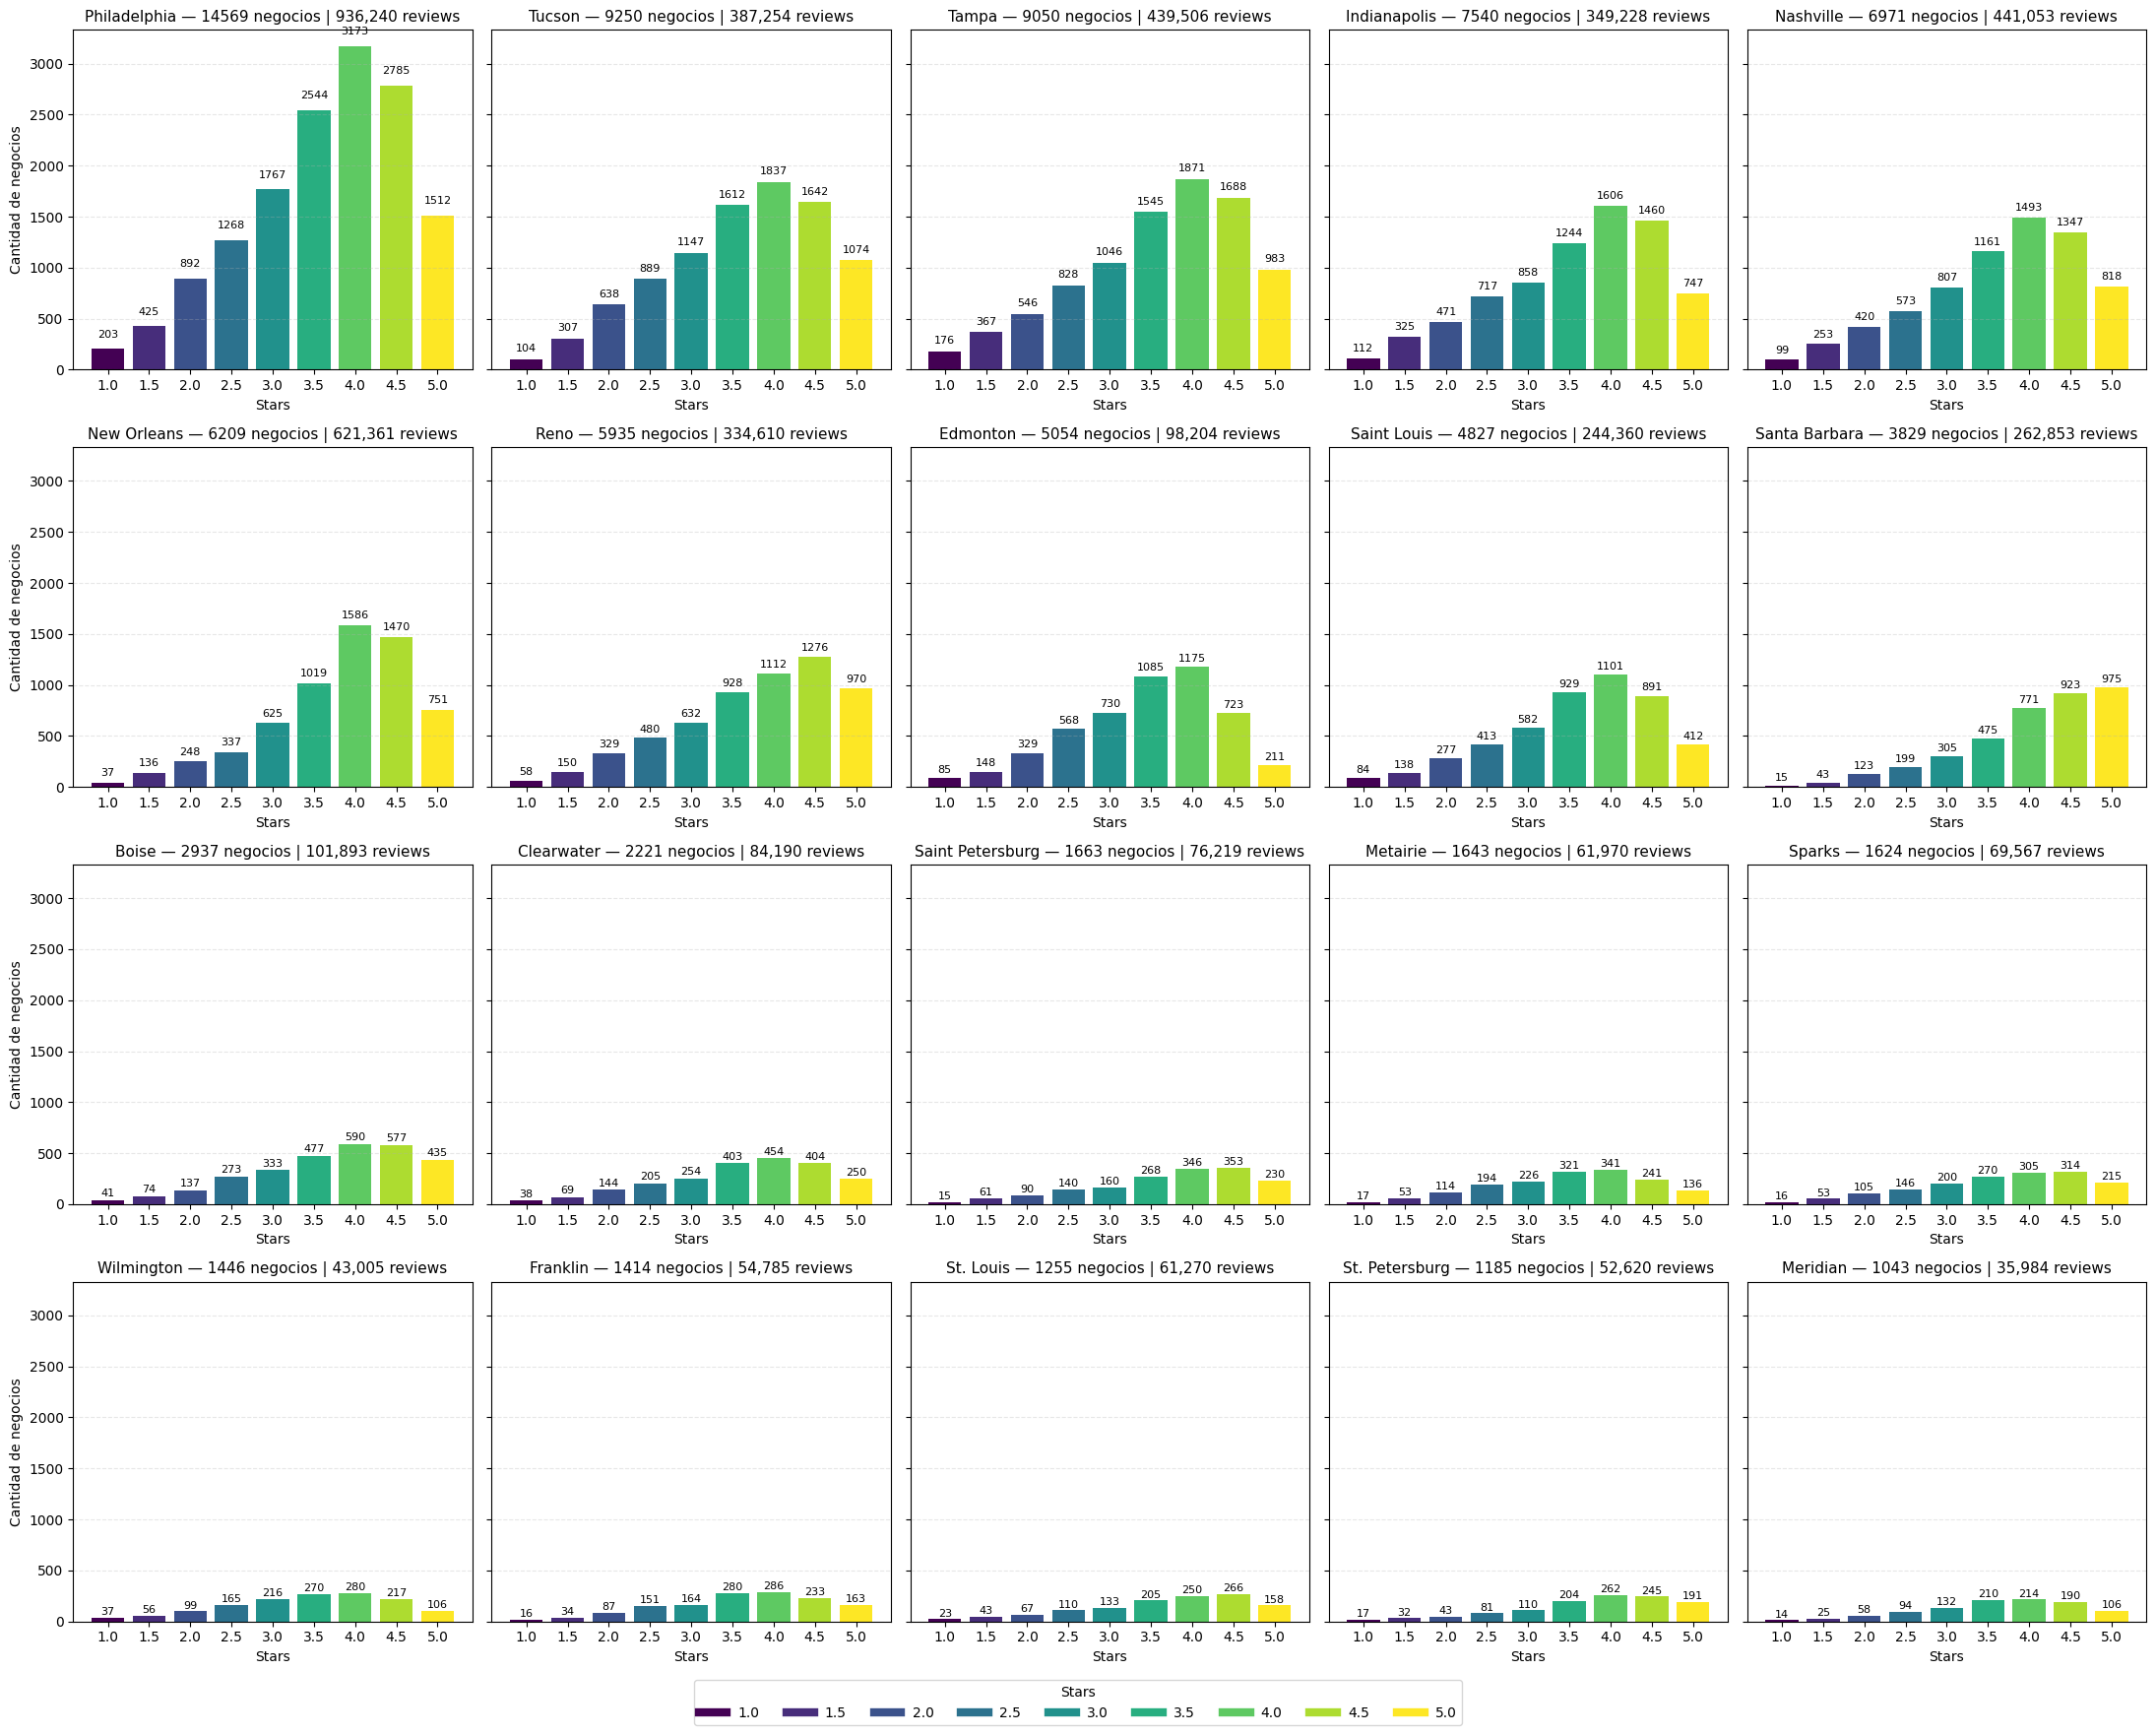

In [53]:
# Negocios por ciudad: top 20 ciudades desagregadas por estrellas
top_n = 20
city_counts = df_business['city'].value_counts()
top_cities = city_counts.head(top_n).index

subset = df_business[df_business['city'].isin(top_cities)]
city_star_counts = subset.groupby(['city', 'stars']).size().unstack(fill_value=0)
city_star_counts = city_star_counts.reindex(columns=sorted(city_star_counts.columns))
city_star_counts = city_star_counts.reindex(top_cities)

city_review_counts = subset.groupby('city')['review_count'].sum().reindex(top_cities).fillna(0)
city_totals = city_star_counts.sum(axis=1)

rows, cols = 4, 5
fig, axes = plt.subplots(rows, cols, figsize=(22, 18), sharey=True)
axes = axes.flatten()
cmap = plt.cm.get_cmap('viridis', city_star_counts.shape[1])
star_labels = [str(s) for s in city_star_counts.columns]

for idx, city in enumerate(top_cities):
    ax = axes[idx]
    counts = city_star_counts.loc[city]
    colors = [cmap(i) for i in range(len(counts))]
    bars = ax.bar(star_labels, counts.values, color=colors)

    total_reviews = city_review_counts.loc[city]
    total_businesses = city_totals.loc[city]
    ax.set_title(f'{city} — {total_businesses:.0f} negocios | {total_reviews:,.0f} reviews', fontsize=11)
    ax.set_xlabel('Stars')
    if idx % cols == 0:
        ax.set_ylabel('Cantidad de negocios')

    max_height = counts.max() or 1
    for bar, value in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, value + max_height * 0.03, f'{value:.0f}', ha='center', va='bottom', fontsize=8)

    ax.grid(axis='y', linestyle='--', alpha=0.3)

for ax in axes[len(top_cities):]:
    ax.axis('off')

handles = [plt.Line2D([0], [0], color=cmap(i), lw=6) for i in range(len(star_labels))]
fig.legend(handles, star_labels, title='Stars', loc='lower center', ncol=len(star_labels), bbox_to_anchor=(0.5, 0.02))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


In [54]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [55]:
# Mapa interactivo para explorar negocios
map_columns = ['name', 'city', 'state', 'postal_code', 'latitude', 'longitude']
map_df = df_business[map_columns].dropna()

# Limitamos la cantidad de puntos para mantener el mapa interactivo ligero
sample_size = 2000 if len(map_df) > 2000 else len(map_df)
map_sample = map_df.sample(sample_size, random_state=42)

center = [map_sample['latitude'].mean(), map_sample['longitude'].mean()]
biz_map = folium.Map(location=center, zoom_start=4, tiles='CartoDB positron')
cluster = MarkerCluster().add_to(biz_map)

for _, row in map_sample.iterrows():
    popup = (
        f"<b>{row['name']}</b><br>"
        f"{row['city']}, {row['state']} {row['postal_code']}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        weight=0,
        fill=True,
        fill_color='#1f77b4',
        fill_opacity=0.6,
        popup=''.join(popup),
    ).add_to(cluster)

biz_map
